# Compare GT and Rendered Image patchwise and compare frequency domain

In [12]:
import os
import numpy as np
import cv2
from glob import glob
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt

DATASET_SOURCE_PATH = "/home/hjp/KUAICV/NIPS2024_LOCAL/datasets/tandt/train/"

IMG_PATH_LSIT = glob(os.path.join(DATASET_SOURCE_PATH, "images", "*.jpg"))

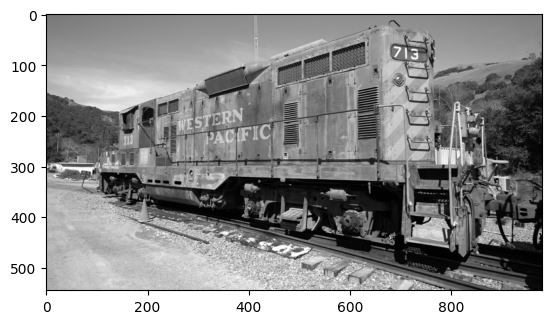

In [44]:
IMG_IDX = 0


def high_frequency_strength(patch):
    # Compute the 2D FFT of the patch
    f = np.fft.fft2(patch)
    # Center the zero-frequency component
    fshift = np.fft.fftshift(f)
    # Compute the magnitude spectrum
    magnitude_spectrum = np.abs(fshift)
    
    # Define high-frequency region (corners of the array)
    # For simplicity, consider a square around the corners to be the high-frequency region
    # Adjust the size of the region as needed
    size = patch.shape[0]
    corner_size = size // 4  # Example: consider outer 25% of the array as high-frequency region
    high_freq_region = np.r_[
        magnitude_spectrum[:corner_size, :corner_size].flat,
        magnitude_spectrum[-corner_size:, :corner_size].flat,
        magnitude_spectrum[:corner_size, -corner_size:].flat,
        magnitude_spectrum[-corner_size:, -corner_size:].flat,
    ]
    
    # Calculate the strength of the high-frequency signal (you can also use other metrics)
    high_freq_strength = np.mean(high_freq_region)
    return high_freq_strength


image = cv2.imread(IMG_PATH_LSIT[IMG_IDX], cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')

patch_size = (8, 8)

frequency_patches = []

high_frequency_score_list = []

for i in range(0, image.shape[0], patch_size[0]):
    for j in range(0, image.shape[1], patch_size[1]):
        # Extract the patch
        patch = image[i:i + patch_size[0], j:j + patch_size[1]]

        # Check if the patch size is as expected (it might not be at the edges)
        if patch.shape[0] == patch_size[0] and patch.shape[1] == patch_size[1]:
            # Compute the 2D Fourier Transform of the patch
            fft_patch = fft2(patch)
            # Shift the zero frequency component to the center
            fft_patch_shifted = fftshift(fft_patch)

            # Save the transformed patch
            frequency_patches.append(fft_patch_shifted)

            strength = high_frequency_strength(patch)
            high_frequency_score_list.append(strength)

# Now `frequency_patches` contains the frequency domain representation of each patch



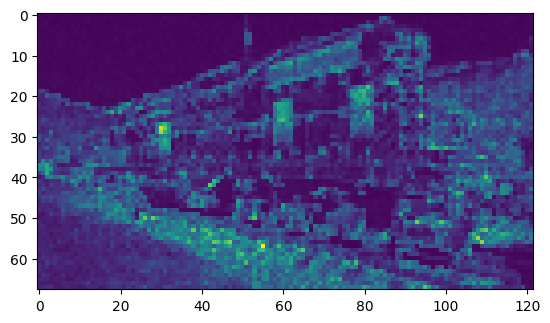

In [47]:
plt.imshow(
    np.array(high_frequency_score_list).reshape(
        image.shape[0] // patch_size[0],
        image.shape[1] // patch_size[1]
    ),
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fft_image(image):
    """Apply FFT to an image and return its magnitude spectrum."""
    f = np.fft.fft2(image)  # FFT
    fshift = np.fft.fftshift(f)  # Shift the zero frequency component to the center
    magnitude_spectrum = 20*np.log(np.abs(fshift))  # Magnitude spectrum
    return magnitude_spectrum

def compare_patches(gt_image, rendered_image, patch_size=(32, 32)):
    """Compare patches and identify where the rendered image has lower frequency than GT."""
    differences = []
    for i in range(0, gt_image.shape[0], patch_size[0]):
        for j in range(0, gt_image.shape[1], patch_size[1]):
            # Extract patches
            gt_patch = gt_image[i:i+patch_size[0], j:j+patch_size[1]]
            rendered_patch = rendered_image[i:i+patch_size[0], j:j+patch_size[1]]
            
            # Apply FFT
            gt_patch_fft = fft_image(gt_patch)
            rendered_patch_fft = fft_image(rendered_patch)
            
            # Calculate difference in frequency content
            diff = np.mean(gt_patch_fft) - np.mean(rendered_patch_fft)
            differences.append((diff, (i, j)))
    
    # Filter to find significant differences where GT has higher frequency content
    significant_differences = [d for d in differences if d[0] > 0]  # Assuming positive diff indicates GT has higher frequency
    return significant_differences

# Example usage
# Assuming gt_img and rendered_img are loaded and are grayscale images
# significant_differences = compare_patches(gt_img, rendered_img)

# You could then visualize or further process these regions.
# For visualization, you might plot the regions on the images or just list their coordinates.


In [ ]:
import numpy as np

def high_frequency_strength(patch):
    # Compute the 2D FFT of the patch
    f = np.fft.fft2(patch)
    # Center the zero-frequency component
    fshift = np.fft.fftshift(f)
    # Compute the magnitude spectrum
    magnitude_spectrum = np.abs(fshift)
    
    # Define high-frequency region (corners of the array)
    # For simplicity, consider a square around the corners to be the high-frequency region
    # Adjust the size of the region as needed
    size = patch.shape[0]
    corner_size = size // 4  # Example: consider outer 25% of the array as high-frequency region
    high_freq_region = np.r_[
        magnitude_spectrum[:corner_size, :corner_size].flat,
        magnitude_spectrum[-corner_size:, :corner_size].flat,
        magnitude_spectrum[:corner_size, -corner_size:].flat,
        magnitude_spectrum[-corner_size:, -corner_size:].flat,
    ]
    
    # Calculate the strength of the high-frequency signal (you can also use other metrics)
    high_freq_strength = np.mean(high_freq_region)
    return high_freq_strength

# Example: Using a random 8x8 patch
patch = np.random.rand(8, 8)
strength = high_frequency_strength(patch)
print(f"High-frequency strength: {strength}")